In [1]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Carregar o arquivo CSV
file_path = 'Dados.csv'  # Altere o caminho se necessário
data = pd.read_csv(file_path)

In [6]:
# Selecionar novo conjunto de colunas
new_columns = ['MODALIDADE', 'ETINIA', 'SITUACAO', 'IDADE']
df_new = data[new_columns].copy()

In [7]:
# Codificar variáveis categóricas em valores numéricos
label_encoders = {}
for column in ['MODALIDADE', 'ETINIA', 'SITUACAO']:
    encoder = LabelEncoder()
    df_new[column] = encoder.fit_transform(df_new[column])
    label_encoders[column] = encoder

In [9]:
# Divisão em variáveis independentes (X) e dependente (y)
X_new = df_new[['MODALIDADE', 'ETINIA', 'SITUACAO']]
y_new = df_new['IDADE']

In [10]:
# Dividir os dados em conjunto de treino e teste
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)

In [11]:
# Ajustar o modelo com o novo conjunto
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [12]:
# Fazer previsões no conjunto de teste
y_pred_new = model_new.predict(X_test_new)

In [13]:
# Avaliar o modelo
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

In [14]:
# Exibir métricas
print(f"Erro Quadrático Médio (MSE): {mse_new}")
print(f"Coeficiente de Determinação (R²): {r2_new}")

Erro Quadrático Médio (MSE): 1342.1765784874526
Coeficiente de Determinação (R²): 0.00561159074051909


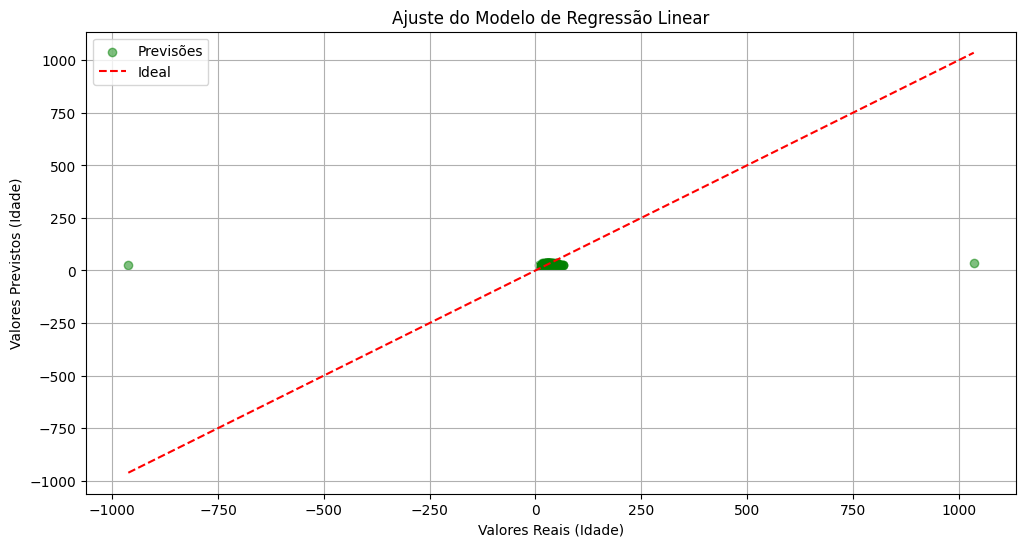

In [15]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.scatter(y_test_new, y_pred_new, alpha=0.5, color='green', label='Previsões')
plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--', label='Ideal')
plt.xlabel('Valores Reais (Idade)')
plt.ylabel('Valores Previstos (Idade)')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.legend()
plt.grid(True)
plt.show()